In [1]:
import os
import json
import glob
import shutil
import cv2
from math import dist
import numpy as np
import matplotlib.pyplot as plt
import re
import pandas as pd
from matplotlib.font_manager import FontProperties

In [2]:
degrees = ['15cm_0mm_0deg', '15cm_25mm_5deg', '15cm_50mm_10deg', '20cm_0mm_0deg', '20cm_25mm_5deg', '20cm_50mm_10deg']

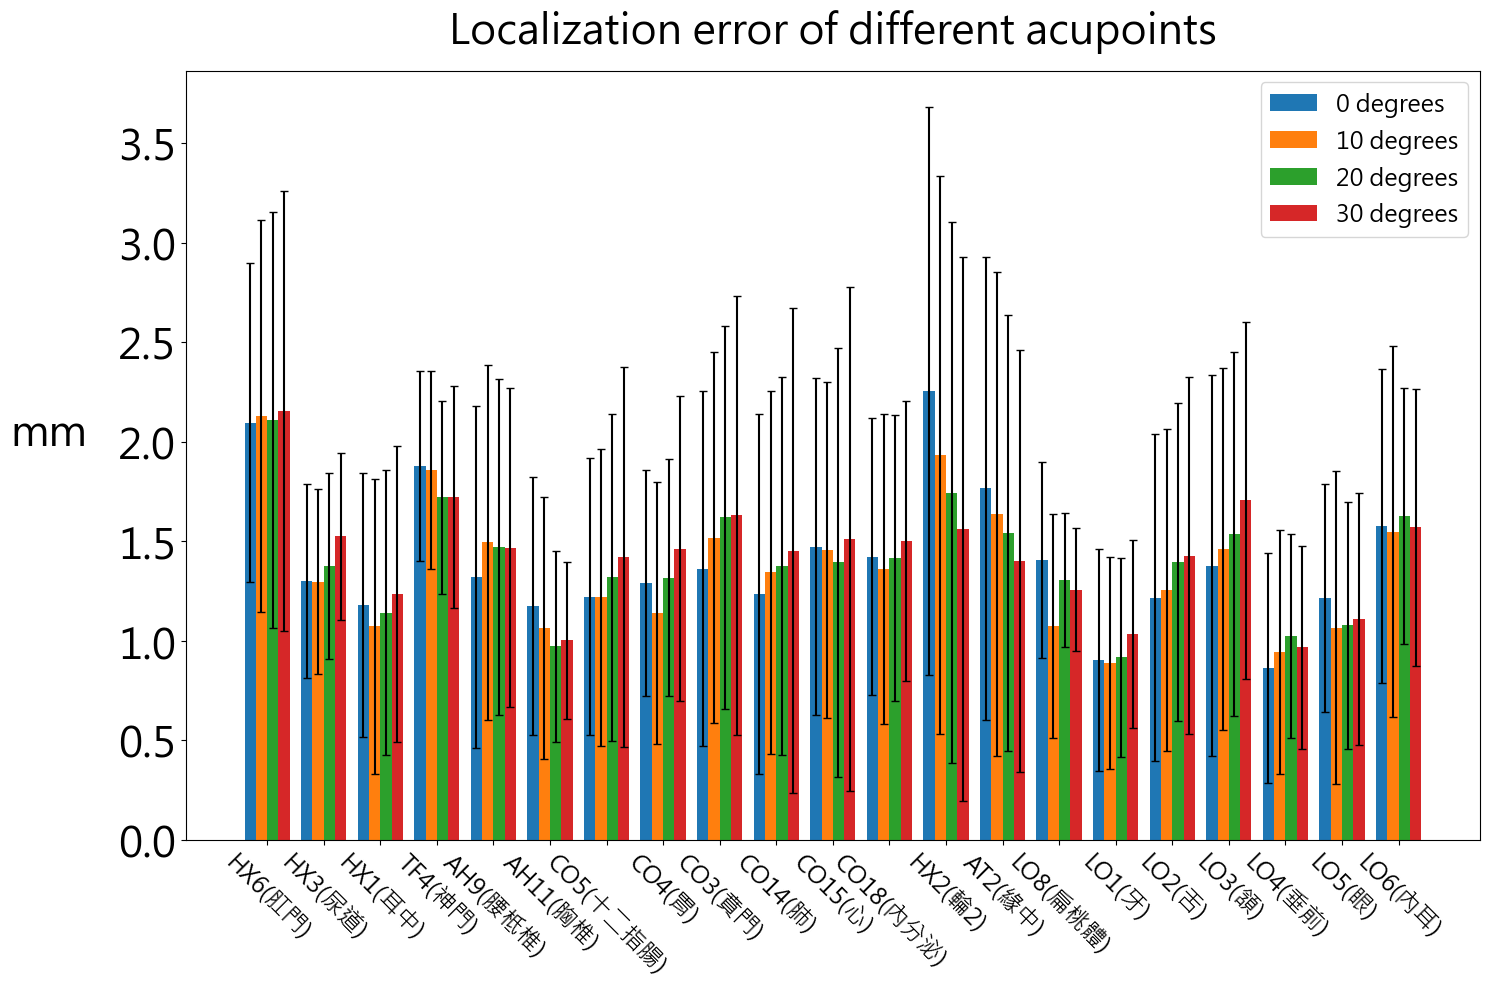

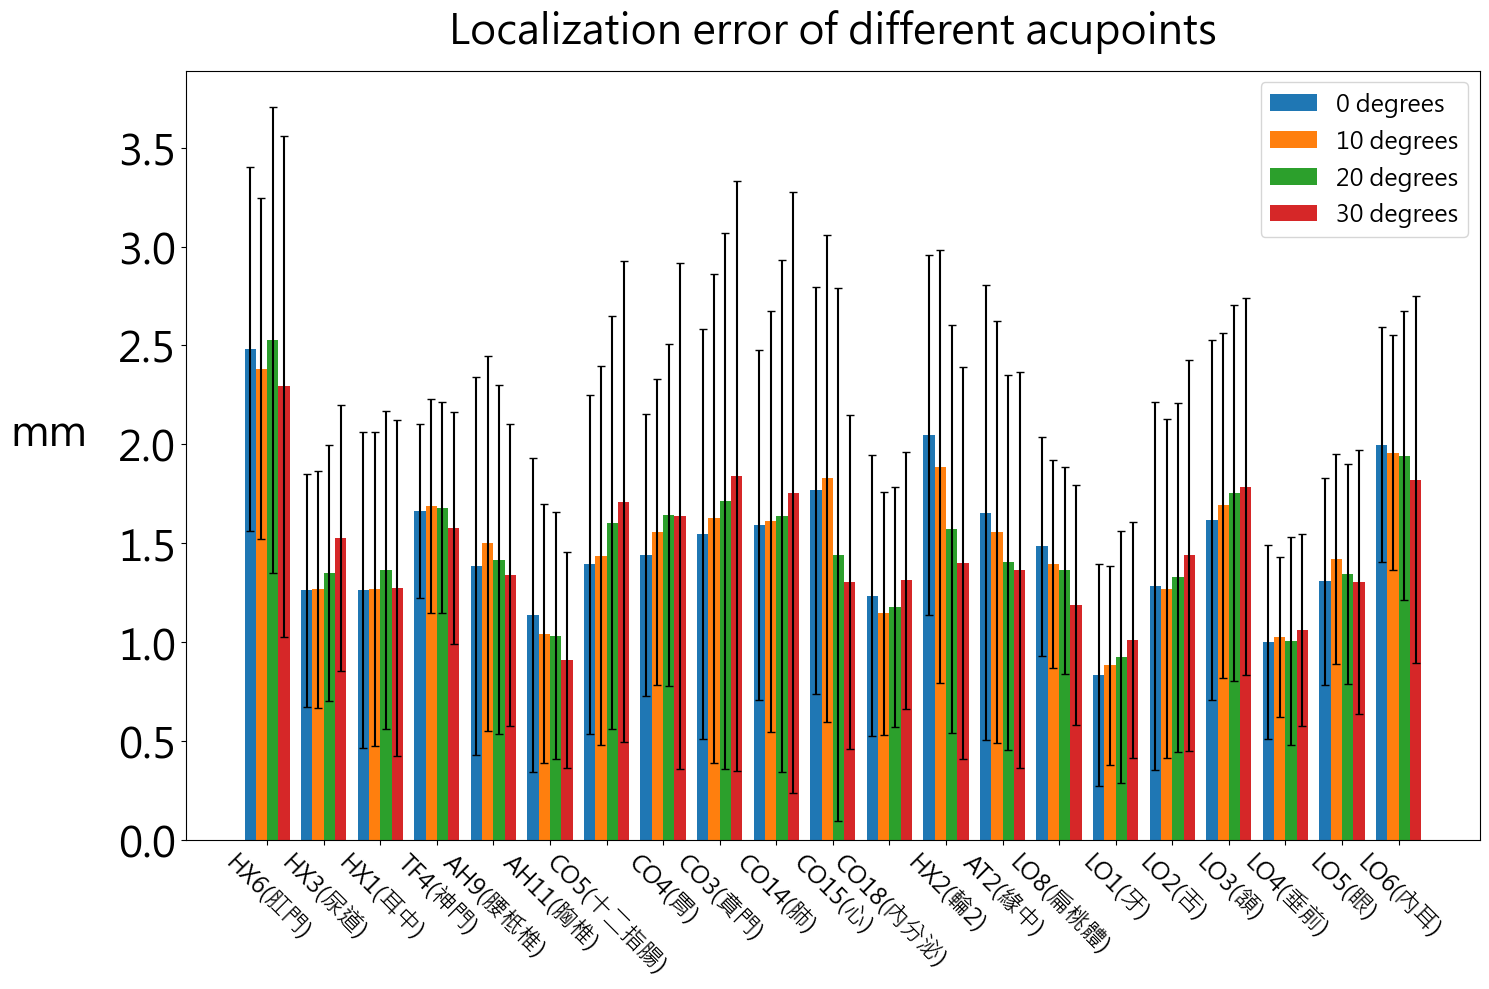

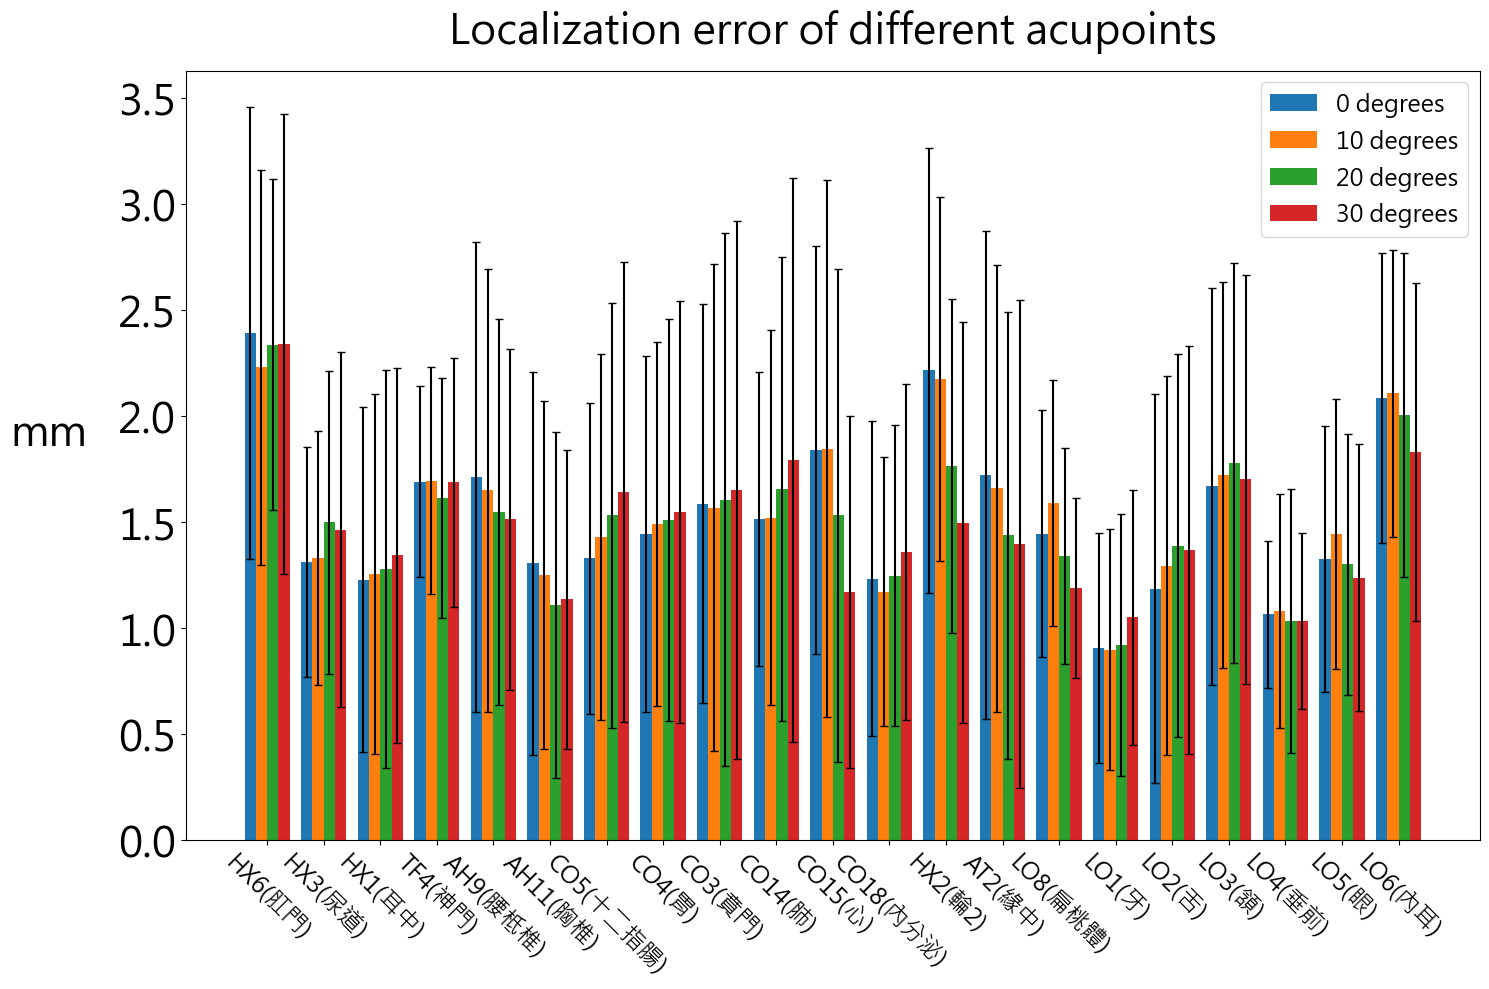

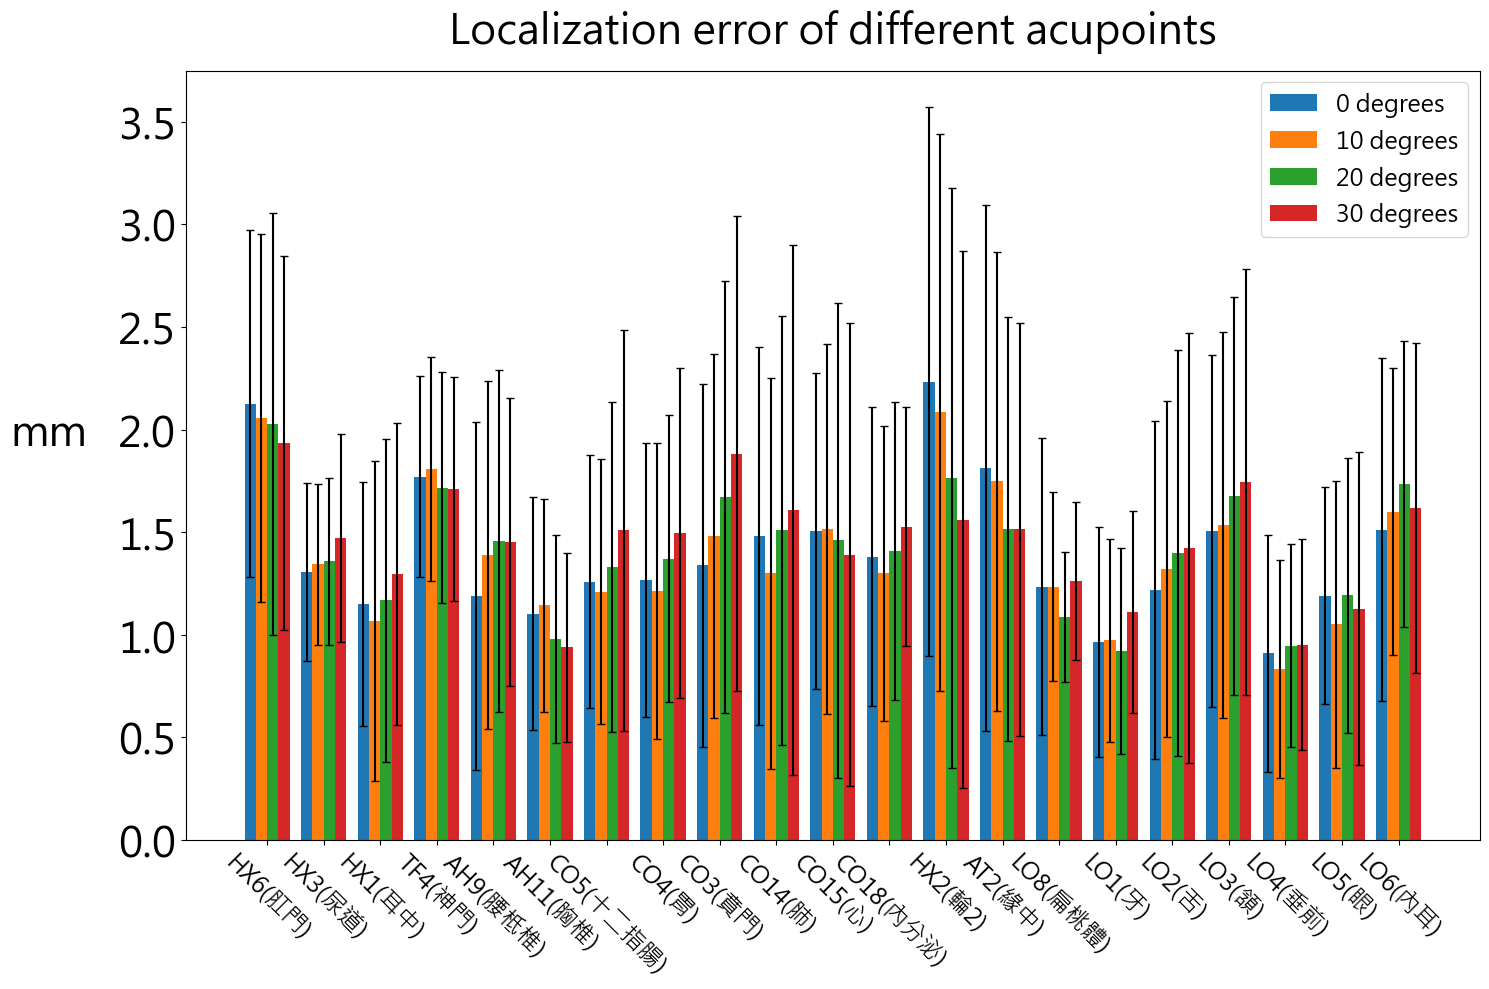

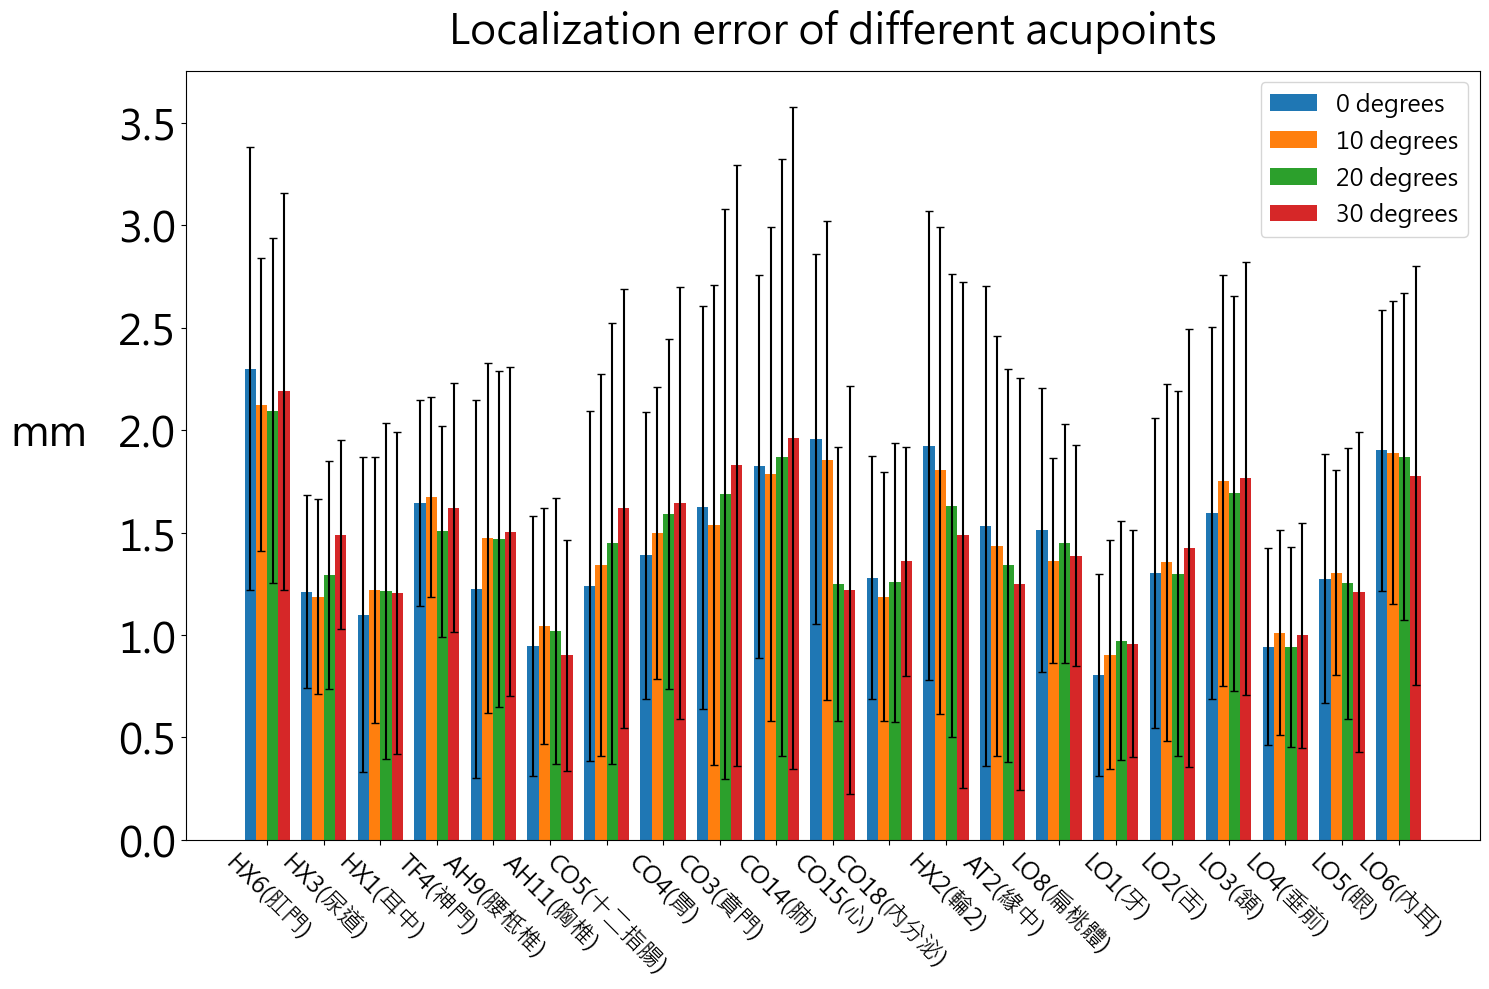

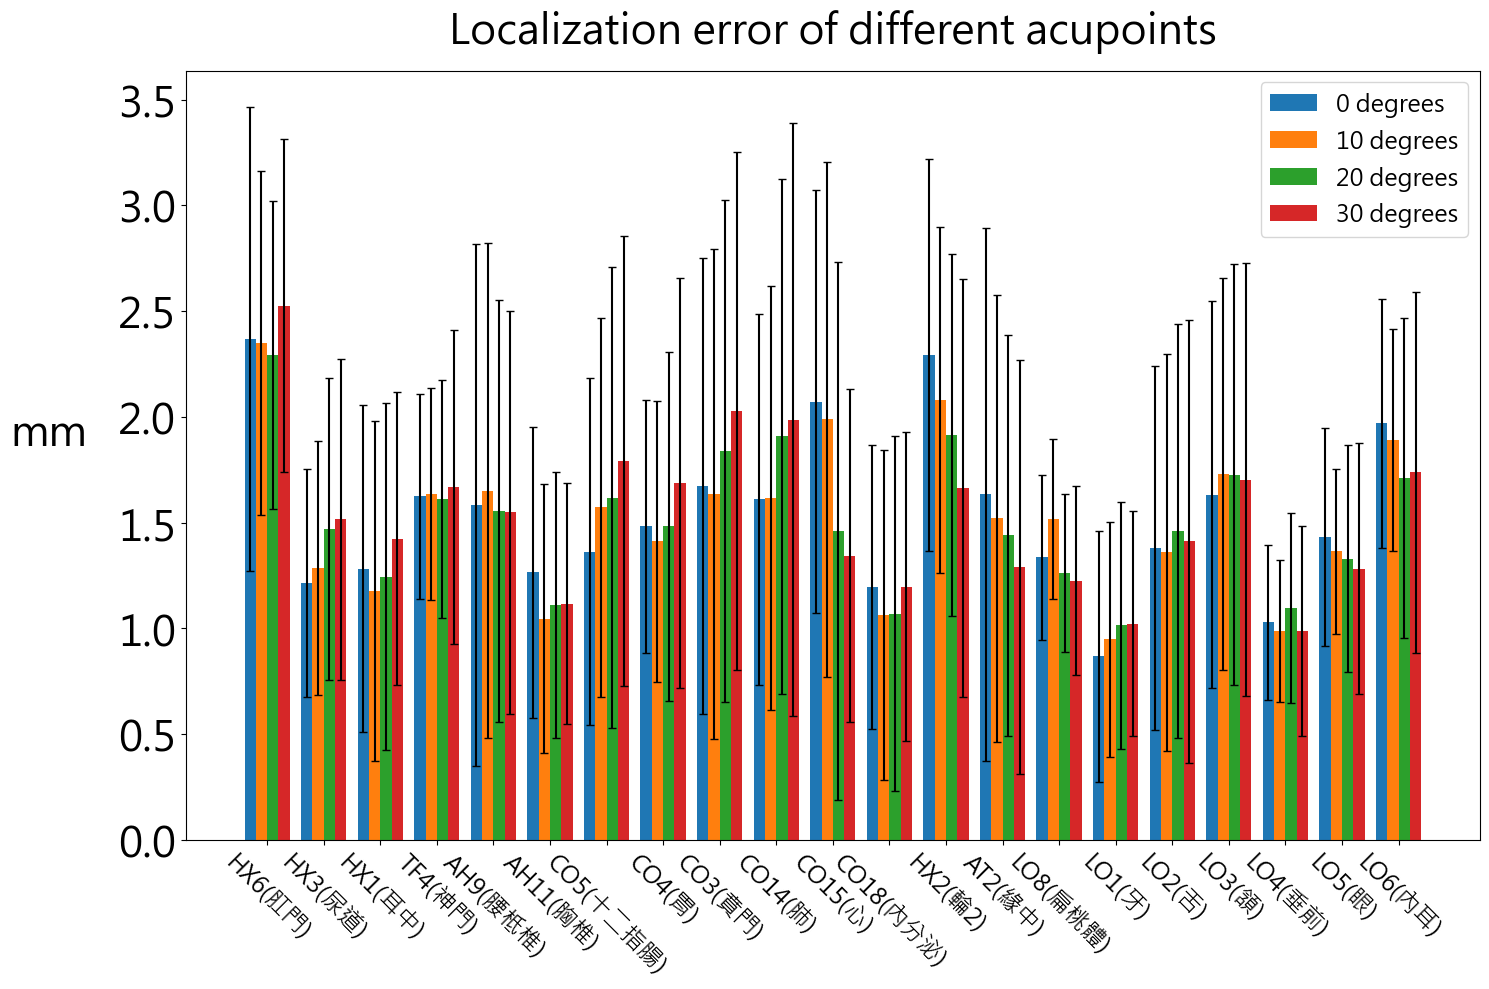

In [3]:
result="../7_result"
occlusion_result = "../9_occlusion_result"
occlusion_error = "../9_occlusion_localization_error"
occlusion_image= "../9_occlusion_image"
occlusion_figure = "../9_occlusion_figure"
cm = [4.45, 4.74, 3.9, 3.86, 4.20, 4.60, 4.69, 4.75]
names = os.listdir(result)
cm_index = 0
acupoints_name = ["HX6(肛門)", "HX3(尿道)", "HX1(耳中)", "TF4(神門)", "AH9(腰柢椎)", "AH11(胸椎)", "CO5(十二指腸)", "CO4(胃)", "CO3(賁門)", "CO14(肺)", "CO15(心)", "CO18(內分泌)", "HX2(輪2)", "AT2(緣中)", "LO8(扁桃體)", "LO1(牙)" , "LO2(舌)", "LO3(頷)", "LO4(垂前)", "LO5(眼)", "LO6(內耳)"]

for deg in degrees:
    
    angles_mean = []
    angles_std = []
    
    for i in range(0, 4):
        
        sum_eight_people = []
    
        for name in names:
            occlusion_error_name_deg = os.path.join(occlusion_error, name, deg)
            error_file = glob.glob(os.path.join(occlusion_error_name_deg, "*.csv"))[0]
            error_df = pd.read_csv(error_file, index_col = 0)

            sum_eight_people.append(error_df.iloc[i,:].to_numpy())
        
        sum_eight_people = np.array(sum_eight_people)
    
        angles_mean.append(np.nanmean(sum_eight_people, axis=0)*10)
        angles_std.append(np.nanstd(sum_eight_people, axis=0)*10)
    
    plt.figure(figsize=(15,10))

    for l in range(0 ,len(angles_mean)):

        plt.bar(np.arange(21) + l*0.2, angles_mean[l], yerr=angles_std[l], align='center', label = '{index} degrees'.format(index = 0 + 10*l), ecolor='black', capsize=3, width=0.2)
    
    
    plt.ylabel('mm' , fontsize = 30, labelpad = 50, rotation = 0)
    
    plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
    
    font_path = r'C:\Windows\Fonts\msjhl.ttc'
    font = FontProperties(fname=font_path, size=12)
    plt.xticks(np.arange(21) + 0.3, acupoints_name, fontsize=17, rotation=-45, ha='center')
    
    
    plt.yticks(fontsize=30)
    plt.title('Localization error of different acupoints', fontsize = 30, pad = 20)

    plt.legend(fontsize=17)

    plt.tight_layout()
    
    if not os.path.isdir(os.path.join(occlusion_figure, deg)):
        os.makedirs(os.path.join(occlusion_figure, deg))
    
    plt.savefig(os.path.join(occlusion_figure, deg,'different acupoints.png').format(index = 0))
    plt.show()
    
    

        
        
        
    
    

        

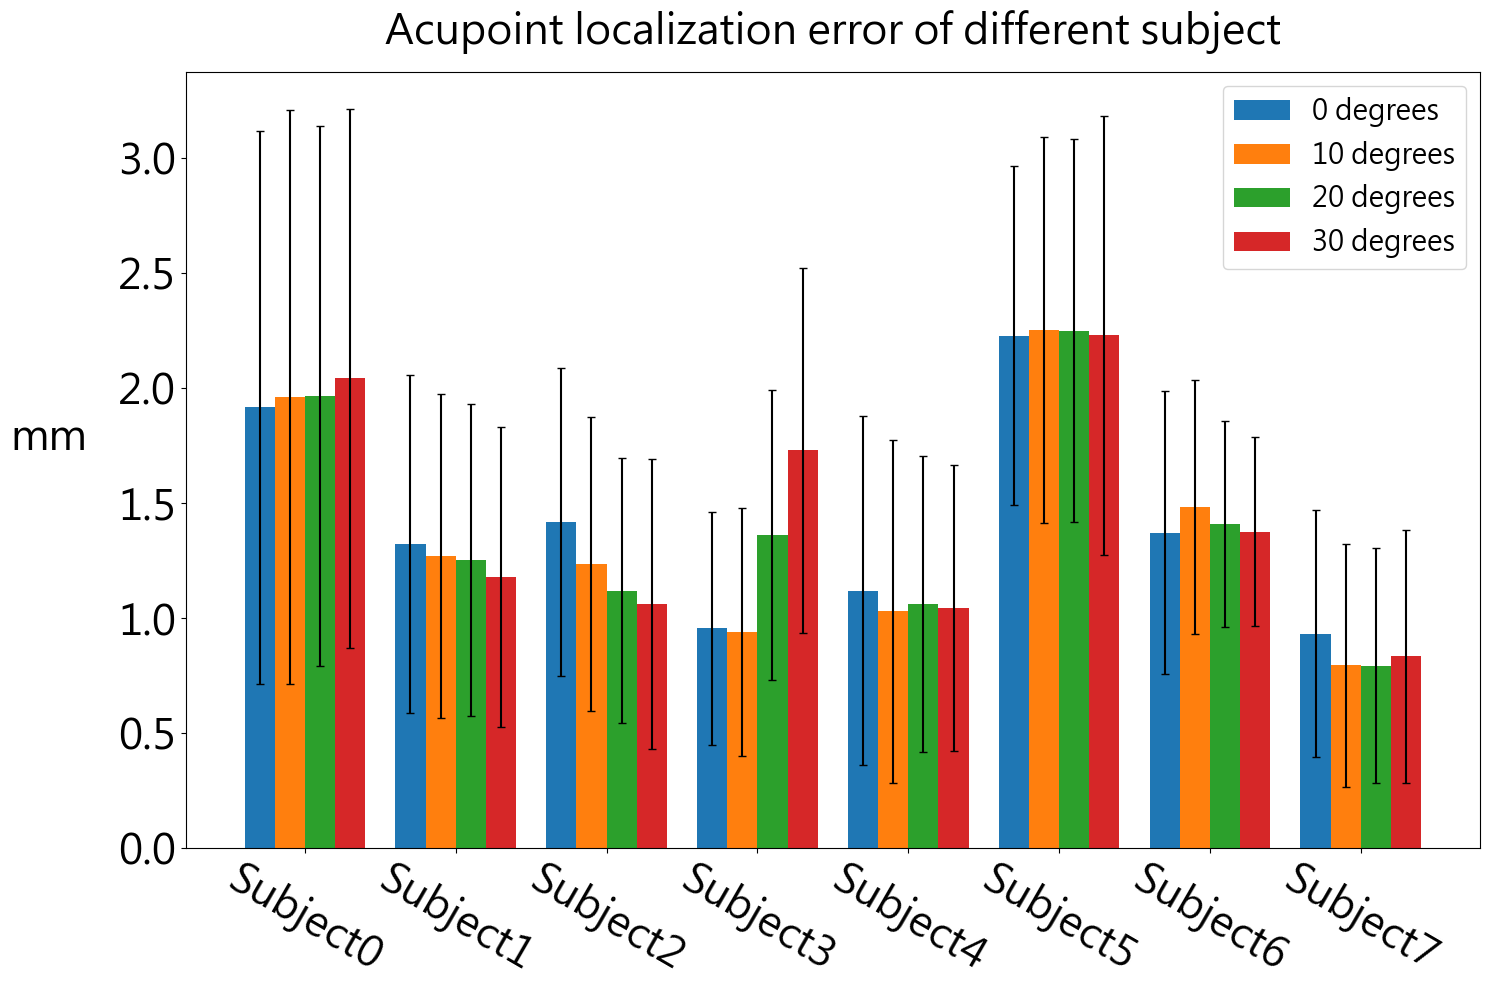

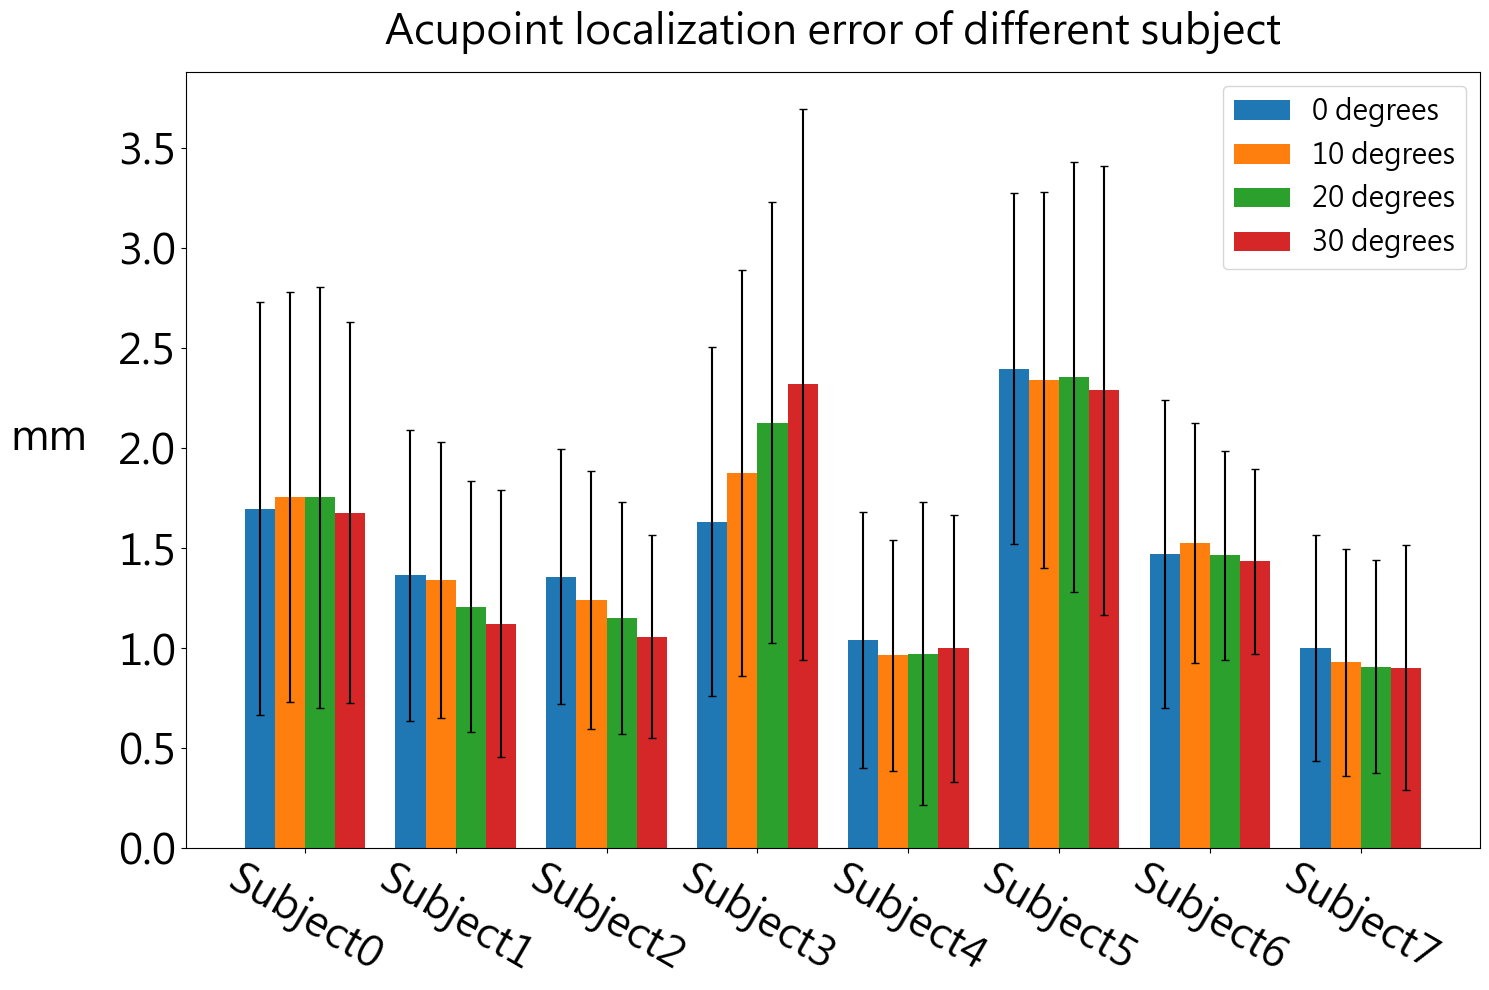

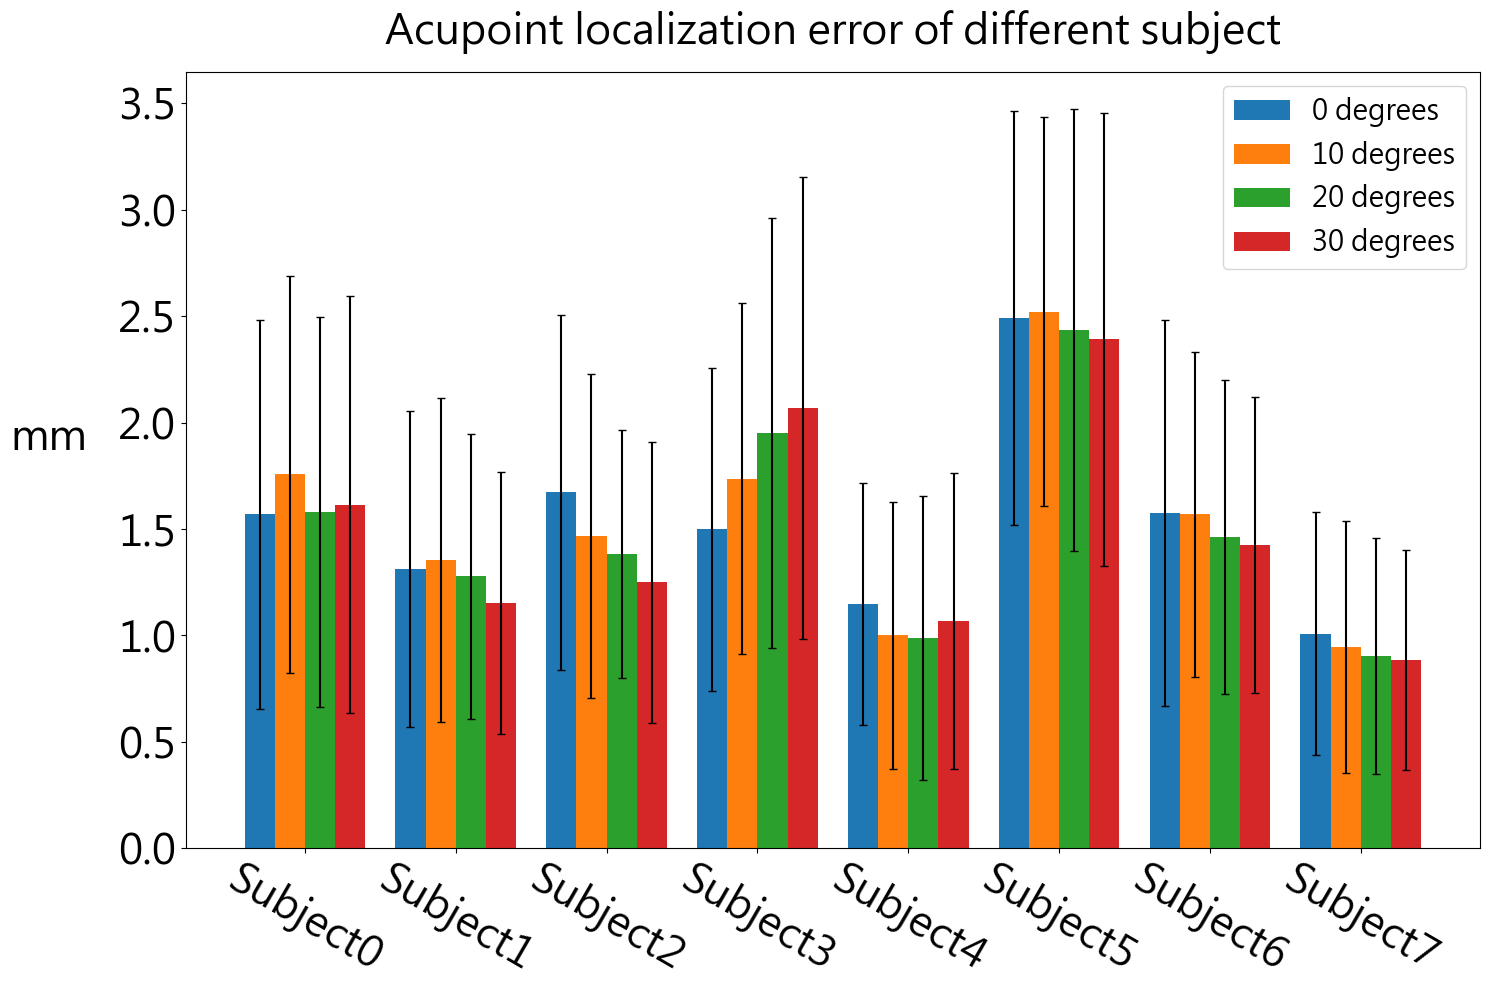

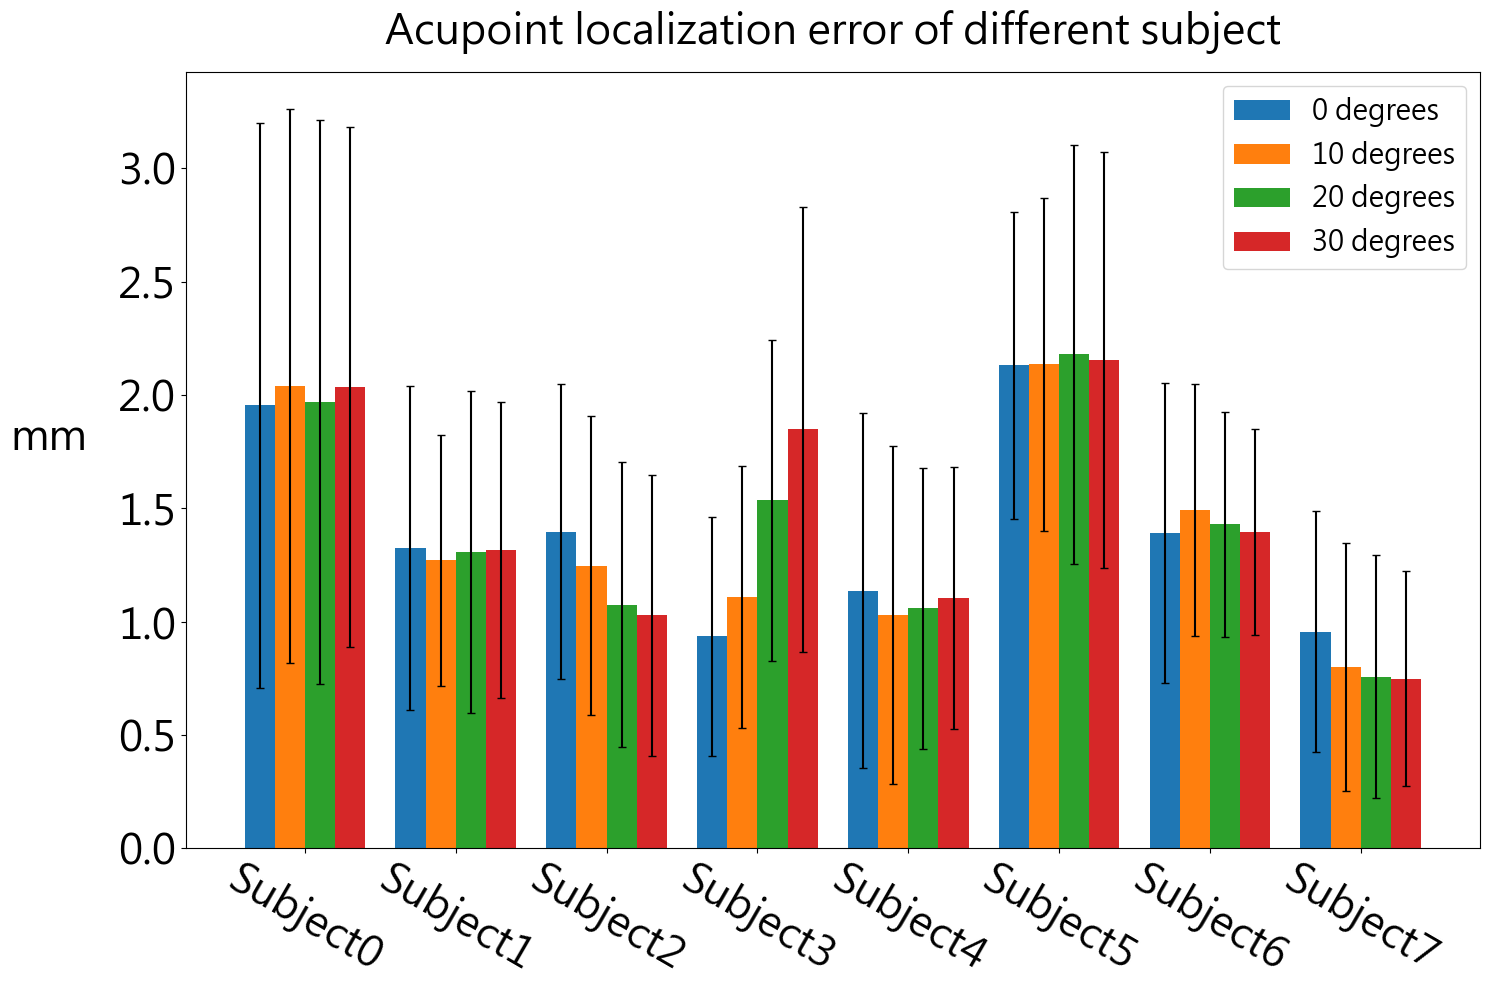

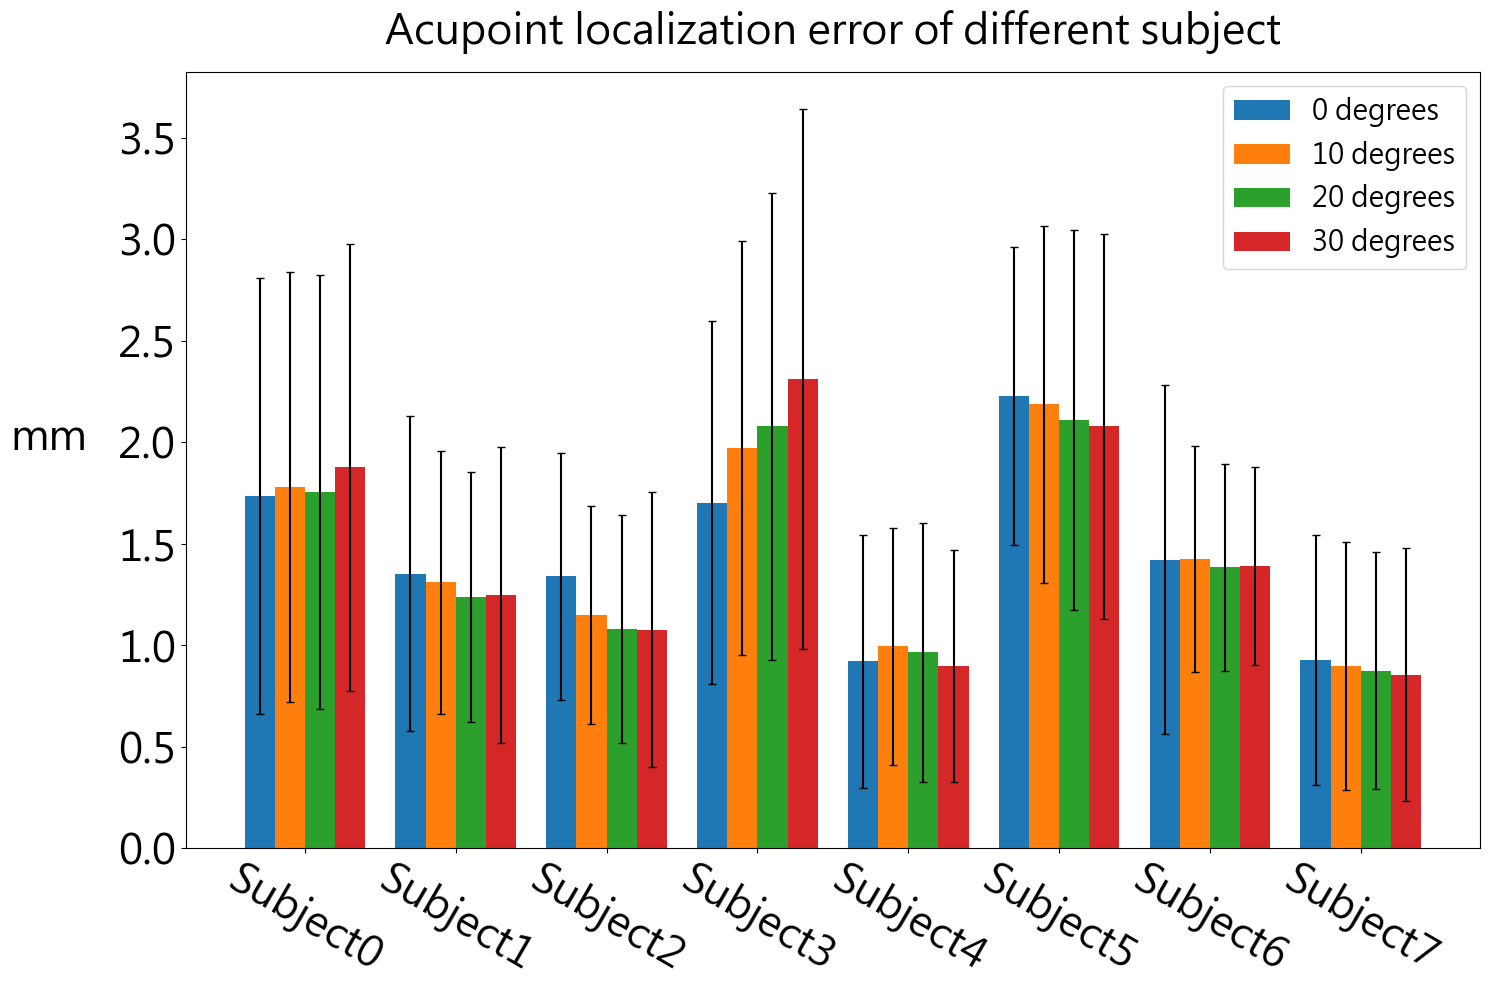

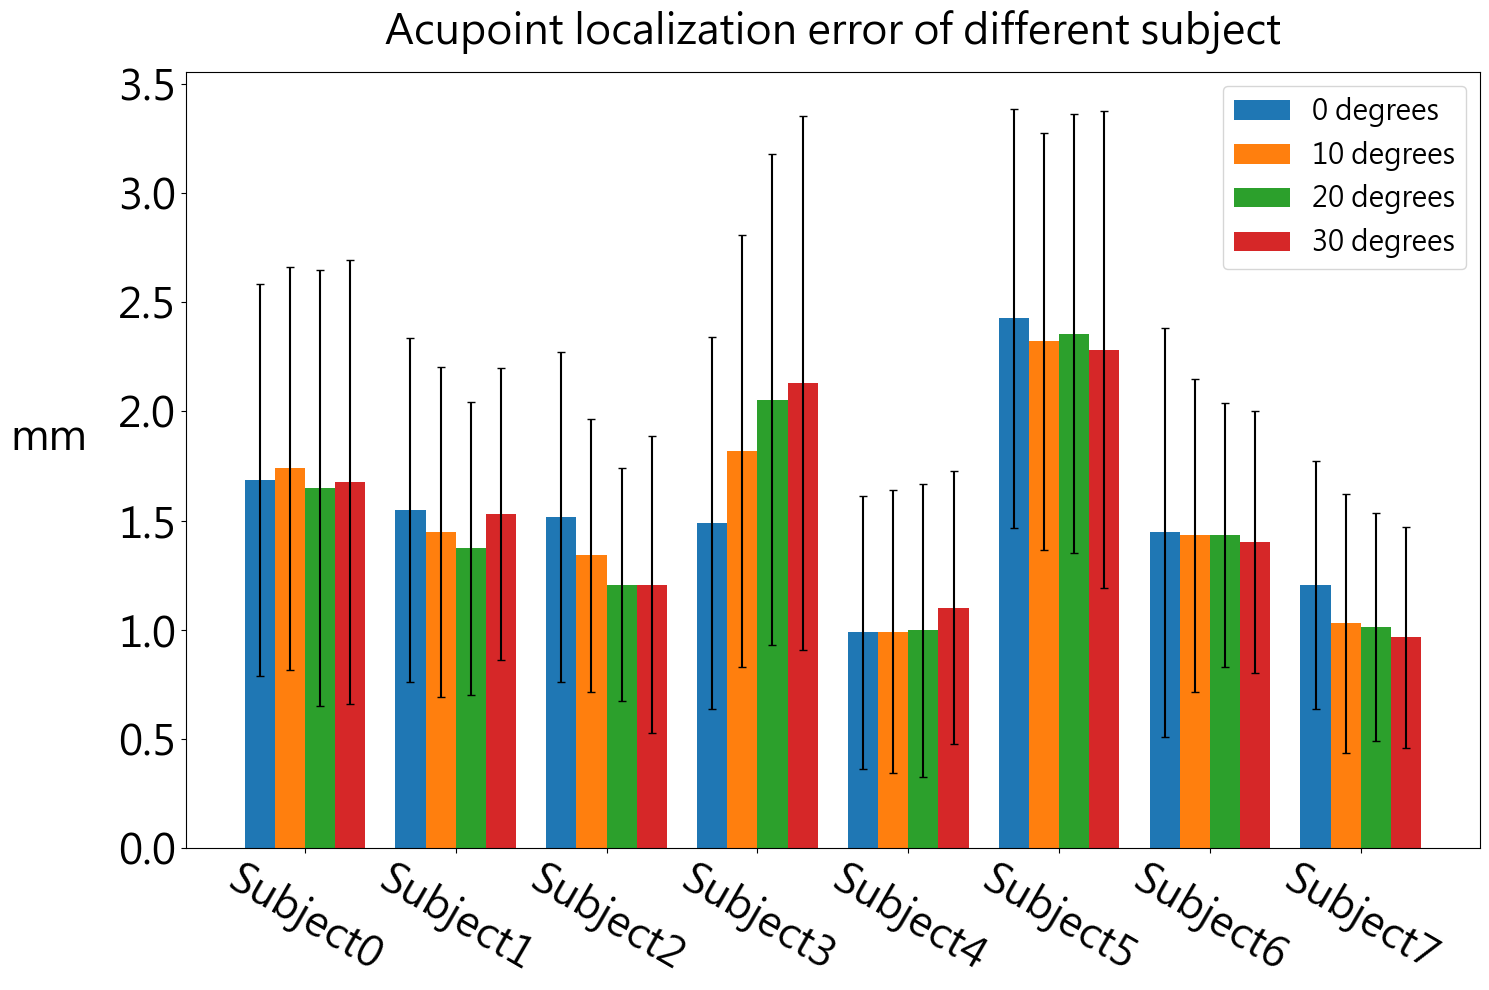

In [4]:
occlusion_figure = "../9_occlusion_figure"
for deg in degrees:
    angles_mean = []
    angles_std = []
    for i in range(0, 4):
        
        sum_eight_people = []
    
        for name in names:
            occlusion_error_name_deg = os.path.join(occlusion_error, name, deg)
            error_file = glob.glob(os.path.join(occlusion_error_name_deg, "*.csv"))[0]
            error_df = pd.read_csv(error_file, index_col = 0)

            sum_eight_people.append(error_df.iloc[i,:].to_numpy())
        
        sum_eight_people = np.array(sum_eight_people)
    
        angles_mean.append(np.nanmean(sum_eight_people, axis=1)*10)
        angles_std.append(np.nanstd(sum_eight_people, axis=1)*10)

    plt.figure(figsize=(15,10))

    for l in range(0 ,len(angles_mean)):

        plt.bar(np.arange(8) + l*0.2, angles_mean[l], yerr=angles_std[l], align='center', label = '{index} degrees'.format(index = 0 + 10*l), ecolor='black', capsize=3, width=0.2)
    
    plt.ylabel('mm' , fontsize = 30, labelpad = 50, rotation = 0)

    plt.xticks(np.arange(8) + 0.3, ["Subject"+str(x) for x in list(range(0 , 8))], fontsize=30, rotation=-30)
    
    
    plt.yticks(fontsize=30)
    plt.title('Acupoint localization error of different subject', fontsize = 30, pad = 20)

    plt.legend(fontsize=20)

    plt.tight_layout()
    if not os.path.isdir(os.path.join(occlusion_figure, deg)):
        os.makedirs(os.path.join(occlusion_figure, deg))
    plt.savefig(os.path.join(occlusion_figure, deg,'different subject.png').format(index = 0))
    plt.show()
        
    
    
        
        
                
        
        